In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import pandas as pd
import numpy as np

In [6]:
df=pd.read_csv("/kaggle/input/things-we-do-for-family-some-bald-guy/parental_leave.csv",encoding="latin1")

In [7]:
df

,Company,Industry,Paid Maternity Leave,Unpaid Maternity Leave,Paid Paternity Leave,Unpaid Paternity Leave,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Epsilon,Advertising,6.0,6.0,6.0,6.0,NaN,NaN,NaN,NaN
1,The Walt Disney Company,Arts & Entertainment,5.0,4.0,4.5,4.0,NaN,NaN,NaN,NaN
2,Guild Education,Business Services: Other,14.0,0.0,8.0,4.0,NaN,NaN,NaN,NaN
3,WeWork,Business Services: Other,14.0,2.0,16.0,4.0,NaN,NaN,NaN,NaN
4,Randstad USA,Business Services: Staffing & Outsourcing,5.0,7.0,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1596,Xero,Technology: Software,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1597,Fedex Supply Chain,Transportation: Freight & Logistics,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1598,Schneider National,Transportation: Freight & Logistics,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1599,HD Supply,Wholesale,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Company                 1601 non-null   object 
 1   Industry                1598 non-null   object 
 2   Paid Maternity Leave    1601 non-null   float64
 3   Unpaid Maternity Leave  1494 non-null   float64
 4   Paid Paternity Leave    289 non-null    float64
 5   Unpaid Paternity Leave  64 non-null     float64
 6   Unnamed: 6              0 non-null      float64
 7   Unnamed: 7              0 non-null      float64
 8   Unnamed: 8              0 non-null      float64
 9   Unnamed: 9              0 non-null      float64
dtypes: float64(8), object(2)
memory usage: 125.2+ KB


In [9]:
df.describe()

,Paid Maternity Leave,Unpaid Maternity Leave,Paid Paternity Leave,Unpaid Paternity Leave,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
count,1601.000000,1494.000000,289.000000,64.000000,0.0,0.0,0.0,0.0
mean,10.909119,6.628849,7.332180,7.734375,NaN,NaN,NaN,NaN
std,8.024514,9.274953,6.817591,6.831863,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,6.000000,0.000000,2.000000,2.000000,NaN,NaN,NaN,NaN
50%,11.000000,4.000000,6.000000,6.000000,NaN,NaN,NaN,NaN
75%,12.000000,10.000000,12.000000,12.000000,NaN,NaN,NaN,NaN
max,52.000000,52.000000,51.000000,29.000000,NaN,NaN,NaN,NaN


In [10]:
df.isna().sum()

Company                      0
Industry                     3
Paid Maternity Leave         0
Unpaid Maternity Leave     107
Paid Paternity Leave      1312
Unpaid Paternity Leave    1537
Unnamed: 6                1601
Unnamed: 7                1601
Unnamed: 8                1601
Unnamed: 9                1601
dtype: int64

In [11]:
df.columns

Index(['Company', 'Industry', 'Paid Maternity Leave', 'Unpaid Maternity Leave',
       'Paid Paternity Leave', 'Unpaid Paternity Leave', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'],
      dtype='object')

In [12]:
df.drop(['Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9'],axis=1,inplace=True)
df

,Company,Industry,Paid Maternity Leave,Unpaid Maternity Leave,Paid Paternity Leave,Unpaid Paternity Leave
0,Epsilon,Advertising,6.0,6.0,6.0,6.0
1,The Walt Disney Company,Arts & Entertainment,5.0,4.0,4.5,4.0
2,Guild Education,Business Services: Other,14.0,0.0,8.0,4.0
3,WeWork,Business Services: Other,14.0,2.0,16.0,4.0
4,Randstad USA,Business Services: Staffing & Outsourcing,5.0,7.0,0.0,0.0
...,...,...,...,...,...,...
1596,Xero,Technology: Software,6.0,NaN,NaN,NaN
1597,Fedex Supply Chain,Transportation: Freight & Logistics,2.0,NaN,NaN,NaN
1598,Schneider National,Transportation: Freight & Logistics,0.0,NaN,NaN,NaN
1599,HD Supply,Wholesale,14.0,NaN,NaN,NaN


In [13]:
df['Company'].unique()

array(['Epsilon', 'The Walt Disney Company', 'Guild Education', ...,
       'Schneider National', 'HD Supply', 'Merrimac Industrial Sales'],
      dtype=object)

In [14]:
df.isna().sum()

Company                      0
Industry                     3
Paid Maternity Leave         0
Unpaid Maternity Leave     107
Paid Paternity Leave      1312
Unpaid Paternity Leave    1537
dtype: int64

In [16]:
df.fillna(0.00,inplace=True)

In [17]:
df.isna().sum()

Company                   0
Industry                  0
Paid Maternity Leave      0
Unpaid Maternity Leave    0
Paid Paternity Leave      0
Unpaid Paternity Leave    0
dtype: int64

In [18]:
df

,Company,Industry,Paid Maternity Leave,Unpaid Maternity Leave,Paid Paternity Leave,Unpaid Paternity Leave
0,Epsilon,Advertising,6.0,6.0,6.0,6.0
1,The Walt Disney Company,Arts & Entertainment,5.0,4.0,4.5,4.0
2,Guild Education,Business Services: Other,14.0,0.0,8.0,4.0
3,WeWork,Business Services: Other,14.0,2.0,16.0,4.0
4,Randstad USA,Business Services: Staffing & Outsourcing,5.0,7.0,0.0,0.0
...,...,...,...,...,...,...
1596,Xero,Technology: Software,6.0,0.0,0.0,0.0
1597,Fedex Supply Chain,Transportation: Freight & Logistics,2.0,0.0,0.0,0.0
1598,Schneider National,Transportation: Freight & Logistics,0.0,0.0,0.0,0.0
1599,HD Supply,Wholesale,14.0,0.0,0.0,0.0


In [19]:
df.columns

Index(['Company', 'Industry', 'Paid Maternity Leave', 'Unpaid Maternity Leave',
       'Paid Paternity Leave', 'Unpaid Paternity Leave'],
      dtype='object')

In [22]:
a=df['Paid Maternity Leave']
b=df['Paid Paternity Leave']
c=df['Unpaid Maternity Leave']
d=df['Unpaid Paternity Leave']

In [23]:
df['Paid Parental leave']=a+b
df['Unpaid Parental leave']=c+d
df

,Company,Industry,Paid Maternity Leave,Unpaid Maternity Leave,Paid Paternity Leave,Unpaid Paternity Leave,Paid Parental leave,Unpaid Parental leave
0,Epsilon,Advertising,6.0,6.0,6.0,6.0,12.0,12.0
1,The Walt Disney Company,Arts & Entertainment,5.0,4.0,4.5,4.0,9.5,8.0
2,Guild Education,Business Services: Other,14.0,0.0,8.0,4.0,22.0,4.0
3,WeWork,Business Services: Other,14.0,2.0,16.0,4.0,30.0,6.0
4,Randstad USA,Business Services: Staffing & Outsourcing,5.0,7.0,0.0,0.0,5.0,7.0
...,...,...,...,...,...,...,...,...
1596,Xero,Technology: Software,6.0,0.0,0.0,0.0,6.0,0.0
1597,Fedex Supply Chain,Transportation: Freight & Logistics,2.0,0.0,0.0,0.0,2.0,0.0
1598,Schneider National,Transportation: Freight & Logistics,0.0,0.0,0.0,0.0,0.0,0.0
1599,HD Supply,Wholesale,14.0,0.0,0.0,0.0,14.0,0.0


In [24]:
df['Total Maternity Leave']=a+c
df['Total Paternity Leave']=b+d

df

,Company,Industry,Paid Maternity Leave,Unpaid Maternity Leave,Paid Paternity Leave,Unpaid Paternity Leave,Paid Parental leave,Unpaid Parental leave,Total Maternity Leave,Total Paternity Leave
0,Epsilon,Advertising,6.0,6.0,6.0,6.0,12.0,12.0,12.0,12.0
1,The Walt Disney Company,Arts & Entertainment,5.0,4.0,4.5,4.0,9.5,8.0,9.0,8.5
2,Guild Education,Business Services: Other,14.0,0.0,8.0,4.0,22.0,4.0,14.0,12.0
3,WeWork,Business Services: Other,14.0,2.0,16.0,4.0,30.0,6.0,16.0,20.0
4,Randstad USA,Business Services: Staffing & Outsourcing,5.0,7.0,0.0,0.0,5.0,7.0,12.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1596,Xero,Technology: Software,6.0,0.0,0.0,0.0,6.0,0.0,6.0,0.0
1597,Fedex Supply Chain,Transportation: Freight & Logistics,2.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0
1598,Schneider National,Transportation: Freight & Logistics,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1599,HD Supply,Wholesale,14.0,0.0,0.0,0.0,14.0,0.0,14.0,0.0


In [25]:
#Which companies offer the most paid parental leave weeks?
x=df.loc[:,['Company','Paid Parental leave']]
x.sort_values(by='Paid Parental leave',ascending=False)


,Company,Paid Parental leave
47,Grant Thornton,102.0
148,LAC-Group,67.5
129,Flatiron Health,60.0
207,Hewlett Packard Enterprise,52.0
1431,JHC Systems,52.0
...,...,...
1219,Uniqlo,0.0
986,Mayer Brown,0.0
1229,Industrious,0.0
1235,"Clean Harbors, Inc.",0.0


In [26]:
e=df['Total Maternity Leave'].sum()
f=df['Total Paternity Leave'].sum()
if e>f:
    print("Yes,  maternity leave typically longer than paternity leave")
else:
    printy("No,  maternity leave typically longer than paternity leave")

Yes,  maternity leave typically longer than paternity leave


In [27]:
df['Maternity leaves vs Paternity Leaves']=''
df

,Company,Industry,Paid Maternity Leave,Unpaid Maternity Leave,Paid Paternity Leave,Unpaid Paternity Leave,Paid Parental leave,Unpaid Parental leave,Total Maternity Leave,Total Paternity Leave,Maternity leaves vs Paternity Leaves
0,Epsilon,Advertising,6.0,6.0,6.0,6.0,12.0,12.0,12.0,12.0,
1,The Walt Disney Company,Arts & Entertainment,5.0,4.0,4.5,4.0,9.5,8.0,9.0,8.5,
2,Guild Education,Business Services: Other,14.0,0.0,8.0,4.0,22.0,4.0,14.0,12.0,
3,WeWork,Business Services: Other,14.0,2.0,16.0,4.0,30.0,6.0,16.0,20.0,
4,Randstad USA,Business Services: Staffing & Outsourcing,5.0,7.0,0.0,0.0,5.0,7.0,12.0,0.0,
...,...,...,...,...,...,...,...,...,...,...,...
1596,Xero,Technology: Software,6.0,0.0,0.0,0.0,6.0,0.0,6.0,0.0,
1597,Fedex Supply Chain,Transportation: Freight & Logistics,2.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,
1598,Schneider National,Transportation: Freight & Logistics,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
1599,HD Supply,Wholesale,14.0,0.0,0.0,0.0,14.0,0.0,14.0,0.0,


In [28]:
df.fillna(0,inplace=True)

In [29]:
df.loc[df['Total Maternity Leave'] >= df['Total Paternity Leave'], ['Maternity leaves vs Paternity Leaves']]="True"
df.loc[df['Total Maternity Leave'] < df['Total Paternity Leave'], ['Maternity leaves vs Paternity Leaves']]="False"

df
                                            

,Company,Industry,Paid Maternity Leave,Unpaid Maternity Leave,Paid Paternity Leave,Unpaid Paternity Leave,Paid Parental leave,Unpaid Parental leave,Total Maternity Leave,Total Paternity Leave,Maternity leaves vs Paternity Leaves
0,Epsilon,Advertising,6.0,6.0,6.0,6.0,12.0,12.0,12.0,12.0,True
1,The Walt Disney Company,Arts & Entertainment,5.0,4.0,4.5,4.0,9.5,8.0,9.0,8.5,True
2,Guild Education,Business Services: Other,14.0,0.0,8.0,4.0,22.0,4.0,14.0,12.0,True
3,WeWork,Business Services: Other,14.0,2.0,16.0,4.0,30.0,6.0,16.0,20.0,False
4,Randstad USA,Business Services: Staffing & Outsourcing,5.0,7.0,0.0,0.0,5.0,7.0,12.0,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...
1596,Xero,Technology: Software,6.0,0.0,0.0,0.0,6.0,0.0,6.0,0.0,True
1597,Fedex Supply Chain,Transportation: Freight & Logistics,2.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,True
1598,Schneider National,Transportation: Freight & Logistics,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
1599,HD Supply,Wholesale,14.0,0.0,0.0,0.0,14.0,0.0,14.0,0.0,True


In [30]:
# Is maternity leave typically longer than paternity leave?"yes"
df['Maternity leaves vs Paternity Leaves'].value_counts()

Maternity leaves vs Paternity Leaves
True     1575
False      26
Name: count, dtype: int64

In [31]:
df.columns

Index(['Company', 'Industry', 'Paid Maternity Leave', 'Unpaid Maternity Leave',
       'Paid Paternity Leave', 'Unpaid Paternity Leave', 'Paid Parental leave',
       'Unpaid Parental leave', 'Total Maternity Leave',
       'Total Paternity Leave', 'Maternity leaves vs Paternity Leaves'],
      dtype='object')

In [33]:
df['Industry'].nunique()

186

In [34]:
df.head()

,Company,Industry,Paid Maternity Leave,Unpaid Maternity Leave,Paid Paternity Leave,Unpaid Paternity Leave,Paid Parental leave,Unpaid Parental leave,Total Maternity Leave,Total Paternity Leave,Maternity leaves vs Paternity Leaves
0,Epsilon,Advertising,6.0,6.0,6.0,6.0,12.0,12.0,12.0,12.0,True
1,The Walt Disney Company,Arts & Entertainment,5.0,4.0,4.5,4.0,9.5,8.0,9.0,8.5,True
2,Guild Education,Business Services: Other,14.0,0.0,8.0,4.0,22.0,4.0,14.0,12.0,True
3,WeWork,Business Services: Other,14.0,2.0,16.0,4.0,30.0,6.0,16.0,20.0,False
4,Randstad USA,Business Services: Staffing & Outsourcing,5.0,7.0,0.0,0.0,5.0,7.0,12.0,0.0,True


In [35]:
df1=df.loc[:,['Industry','Total Maternity Leave','Total Paternity Leave']]
df1

,Industry,Total Maternity Leave,Total Paternity Leave
0,Advertising,12.0,12.0
1,Arts & Entertainment,9.0,8.5
2,Business Services: Other,14.0,12.0
3,Business Services: Other,16.0,20.0
4,Business Services: Staffing & Outsourcing,12.0,0.0
...,...,...,...
1596,Technology: Software,6.0,0.0
1597,Transportation: Freight & Logistics,2.0,0.0
1598,Transportation: Freight & Logistics,0.0,0.0
1599,Wholesale,14.0,0.0


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
df1['Parental leave']=df1['Total Maternity Leave']+df1['Total Paternity Leave']
df1

,Industry,Total Maternity Leave,Total Paternity Leave,Parental leave
0,Advertising,12.0,12.0,24.0
1,Arts & Entertainment,9.0,8.5,17.5
2,Business Services: Other,14.0,12.0,26.0
3,Business Services: Other,16.0,20.0,36.0
4,Business Services: Staffing & Outsourcing,12.0,0.0,12.0
...,...,...,...,...
1596,Technology: Software,6.0,0.0,6.0
1597,Transportation: Freight & Logistics,2.0,0.0,2.0
1598,Transportation: Freight & Logistics,0.0,0.0,0.0
1599,Wholesale,14.0,0.0,14.0


In [37]:
df2=df1.loc[:,['Industry','Parental leave']]
df2

,Industry,Parental leave
0,Advertising,24.0
1,Arts & Entertainment,17.5
2,Business Services: Other,26.0
3,Business Services: Other,36.0
4,Business Services: Staffing & Outsourcing,12.0
...,...,...
1596,Technology: Software,6.0
1597,Transportation: Freight & Logistics,2.0
1598,Transportation: Freight & Logistics,0.0
1599,Wholesale,14.0


In [38]:
z=df2.value_counts()
z

Industry                                      Parental leave
Technology: Software                          12.0              43
Healthcare: Hospitals & Clinics               12.0              19
Advertising                                   12.0              19
Technology: Software                          16.0              14
Educational Services: College & Universities  12.0              12
                                                                ..
Healthcare: Services                          11.0               1
                                              12.0               1
                                              13.0               1
                                              18.0               1
Wholesale                                     20.0               1
Name: count, Length: 1012, dtype: int64

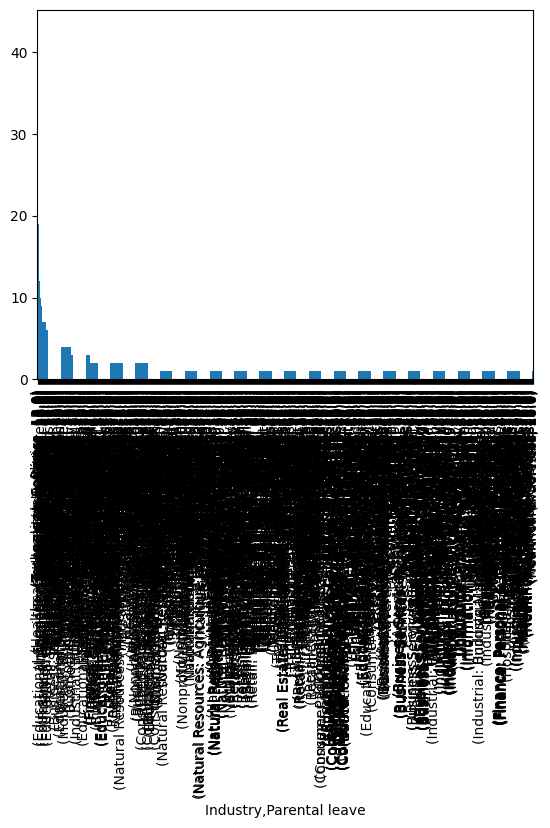

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
z.plot.bar()
plt.show()